In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/Program_1_Dataset - Program_1_Dataset (1).csv")


In [3]:

X = df.drop('MValue', axis=1)
y = df['MValue']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

n_components_90 = (cumulative_explained_variance >= 0.9).argmax() + 1

print(f"Number of components explaining 90% of the variance: {n_components_90}")




Number of components explaining 90% of the variance: 8


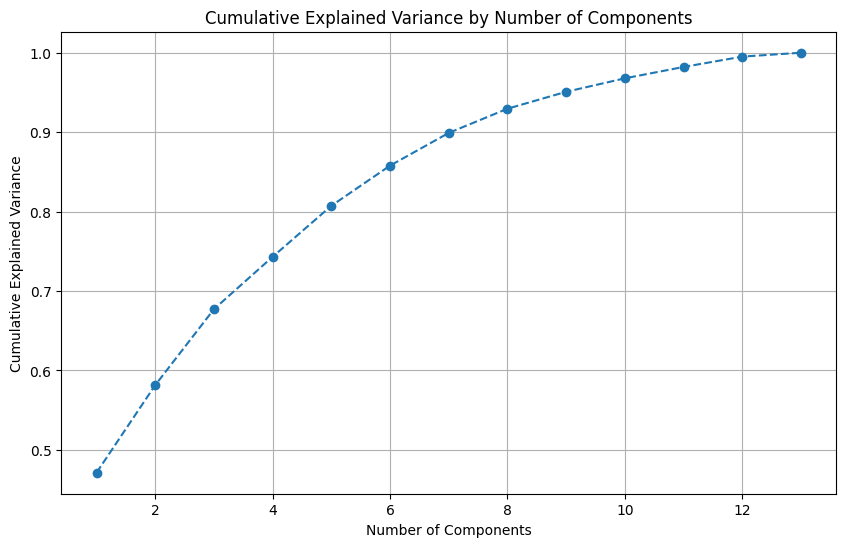

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()


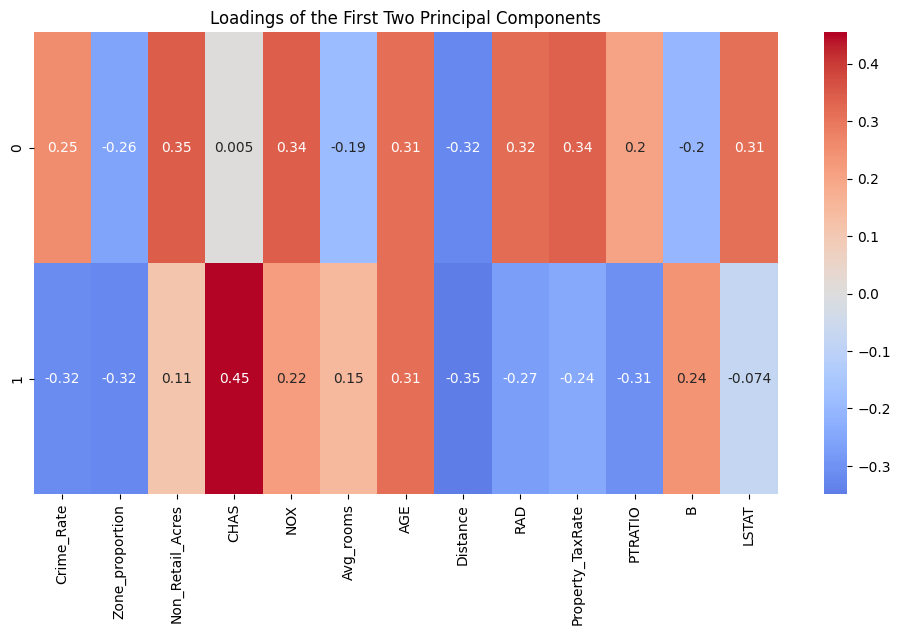

In [6]:
loadings_df = pd.DataFrame(pca.components_[:2, :], columns=X.columns)
plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Loadings of the First Two Principal Components')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :n_components_90], y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 27.349999999999998


In [8]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')


R-squared: 0.6484242255308675
